I am Enes Karanfil. In this notebook, I am going to present my solution. I used Template Matching Algorithm to locating image. For the check my solution, I also used BruteForce Matcing algorithm which is basically matchs the features in between two images.

# First Approach : Feature Matching

A feature is a piece of information which is relevant for solving the computational task related to a certain application. Features may be specific structures in the image such as points, edges or objects. Features may also be the result of a general neighborhood operation or feature detection applied to the image. The features can be classified into two main categories:

   -The features that are in specific locations of the images, such as mountain peaks, building corners, doorways, or interestingly shaped patches of snow. These kinds of localized features are often called keypoint features (or even corners) and are often described by the appearance of patches of pixels surrounding the point location.


   -The features that can be matched based on their orientation and local appearance (edge profiles) are called edges and they can also be good indicators of object boundaries and occlusion events in the image sequence.

In this first approach, I wanted to gain some prior knowledge about matching features (vectors) in between two images. Because, to sake of example, it is hard to see.

In [6]:
import cv2 
import matplotlib.pyplot as plt

img1 = cv2.imread('images/SmartMap/StarMap.png',0)  
img2 = cv2.imread('images/SmartMap/Small_area.png',0)

In [7]:
sift = cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

In [8]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

In [9]:
matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

In this visual, we have two image. Lines indicates matched features.

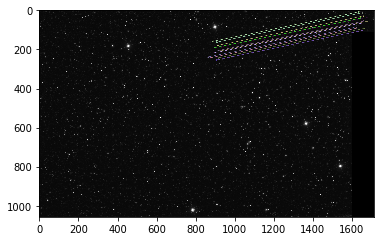

(<matplotlib.image.AxesImage at 0x1017d0f10>, None)

In [10]:
img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:40], img2, flags=2)
plt.imshow(img3),plt.show()

Now, at leat we may guess the answer. Right side of the image (template) looks so tiny.

# Template Matching

Template Matching is a method for searching and finding the location of a template image in a larger image. OpenCV comes with a function cv2.matchTemplate() for this purpose. It simply slides the template image over the input image (as in 2D convolution) and compares the template and patch of input image under the template image.

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("images/SmartMap/StarMap.png",0)
img2 = img.copy()
template = cv2.imread('images/SmartMap/Small_area.png', 0)

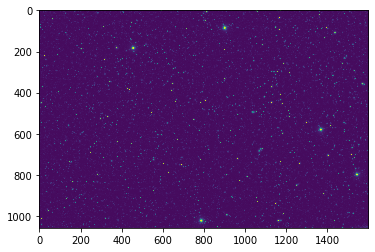

In [12]:
plt.imshow(img)

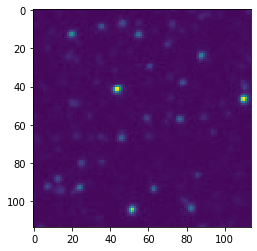

In [13]:
plt.imshow(template)

------------
Method Name:  cv2.TM_CCOEFF
Top Left (855, 150)
Other Edges - (x1,y2), (x2,y1)
969 150
855 264
Bottom Right (969, 264)


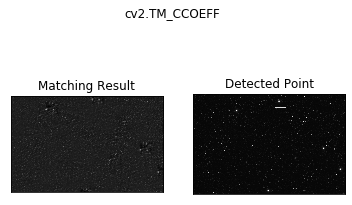

------------
Method Name:  cv2.TM_CCOEFF_NORMED
Top Left (855, 150)
Other Edges - (x1,y2), (x2,y1)
969 150
855 264
Bottom Right (969, 264)


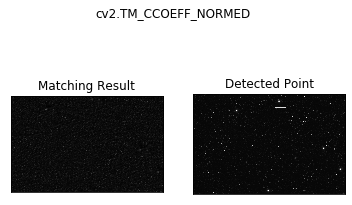

------------
Method Name:  cv2.TM_CCORR
Top Left (411, 142)
Other Edges - (x1,y2), (x2,y1)
525 142
411 256
Bottom Right (525, 256)


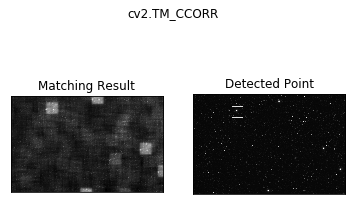

------------
Method Name:  cv2.TM_CCORR_NORMED
Top Left (855, 150)
Other Edges - (x1,y2), (x2,y1)
969 150
855 264
Bottom Right (969, 264)


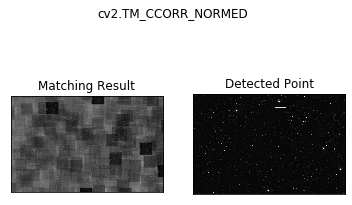

------------
Method Name:  cv2.TM_SQDIFF
Top Left (855, 150)
Other Edges - (x1,y2), (x2,y1)
969 150
855 264
Bottom Right (969, 264)


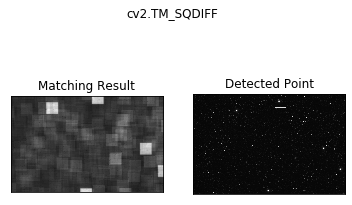

------------
Method Name:  cv2.TM_SQDIFF_NORMED
Top Left (855, 150)
Other Edges - (x1,y2), (x2,y1)
969 150
855 264
Bottom Right (969, 264)


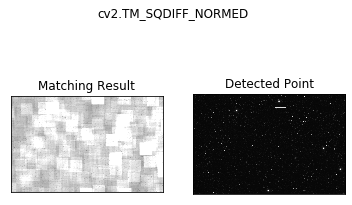

In [14]:
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        
    print("------------")
    print("Method Name: ", meth)
    print("Top Left", (top_left[0],top_left[1]))
    
    print("Other Edges - (x1,y2), (x2,y1)")
    print(top_left[0]+w,top_left[1])
    print(top_left[0],top_left[1]+h)
        
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    print("Bottom Right", bottom_right)

    cv2.rectangle(img,top_left, bottom_right,(222), 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

Now, we have 6 different solution and we have close answers. We can do the same for rotated version.

# Same Solution but different example

As I expected, in this example I got more consistent results.

------------
Method Name:  cv2.TM_CCOEFF
Top Left (427, 53)
Other Edges - (x1,y2), (x2,y1)
686 53
427 300
Bottom Right (686, 300)


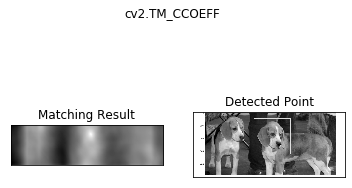

------------
Method Name:  cv2.TM_CCOEFF_NORMED
Top Left (427, 53)
Other Edges - (x1,y2), (x2,y1)
686 53
427 300
Bottom Right (686, 300)


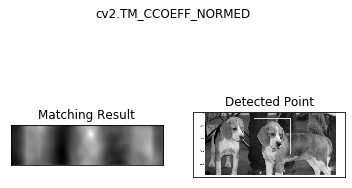

------------
Method Name:  cv2.TM_CCORR
Top Left (818, 215)
Other Edges - (x1,y2), (x2,y1)
1077 215
818 462
Bottom Right (1077, 462)


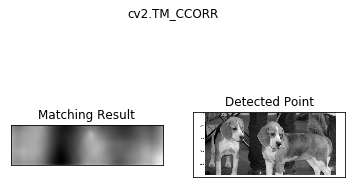

------------
Method Name:  cv2.TM_CCORR_NORMED
Top Left (427, 53)
Other Edges - (x1,y2), (x2,y1)
686 53
427 300
Bottom Right (686, 300)


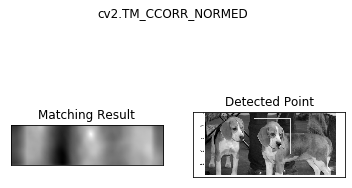

------------
Method Name:  cv2.TM_SQDIFF
Top Left (427, 53)
Other Edges - (x1,y2), (x2,y1)
686 53
427 300
Bottom Right (686, 300)


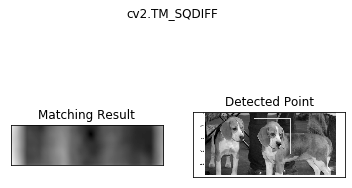

------------
Method Name:  cv2.TM_SQDIFF_NORMED
Top Left (427, 53)
Other Edges - (x1,y2), (x2,y1)
686 53
427 300
Bottom Right (686, 300)


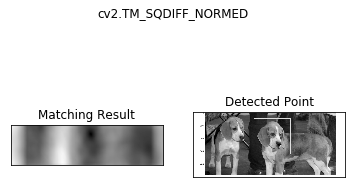

In [15]:
img = cv2.imread("images/Sample 1 - DOG/dog.png",0)
img2 = img.copy()
template = cv2.imread('images/Sample 1 - DOG/small-dog.png', 0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        
    print("------------")
    print("Method Name: ", meth)
    print("Top Left", (top_left[0],top_left[1]))
    
    print("Other Edges - (x1,y2), (x2,y1)")
    print(top_left[0]+w,top_left[1])
    print(top_left[0],top_left[1]+h)
        
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    print("Bottom Right", bottom_right)

    cv2.rectangle(img,top_left, bottom_right,(222), 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

## References:

- OpenCV DOC
- Medium